In [1]:
import pandas as pd
from datetime import timedelta, datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import acquire
from prepare import prep_store_data
import warnings
warnings.filterwarnings("ignore")

from acquire import get_store_data

# plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

In [2]:
df = get_store_data()
df.head()

Data is cached. Reading from .csv files
Items data acquired...
Stores data acquired...
Sales data acquired...
Acquisition complete


,sale_amount,sale_date,sale_id,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode
0,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
2,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
3,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",4,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
4,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",5,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253


,sale_amount,sale_id,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode,month,day,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,13.0,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,January,Tuesday,10.92
2013-01-01 00:00:00+00:00,26.0,211817,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,January,Tuesday,218.40
2013-01-01 00:00:00+00:00,27.0,832657,Mama Marys,46,Pizza Sauce,4.65,35457770664,35457770664,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,January,Tuesday,125.55
2013-01-01 00:00:00+00:00,54.0,213643,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,15000 San Pedro Ave,San Antonio,8,TX,78232,January,Tuesday,453.60
2013-01-01 00:00:00+00:00,35.0,215469,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,735 SW Military Dr,San Antonio,9,TX,78221,January,Tuesday,294.00


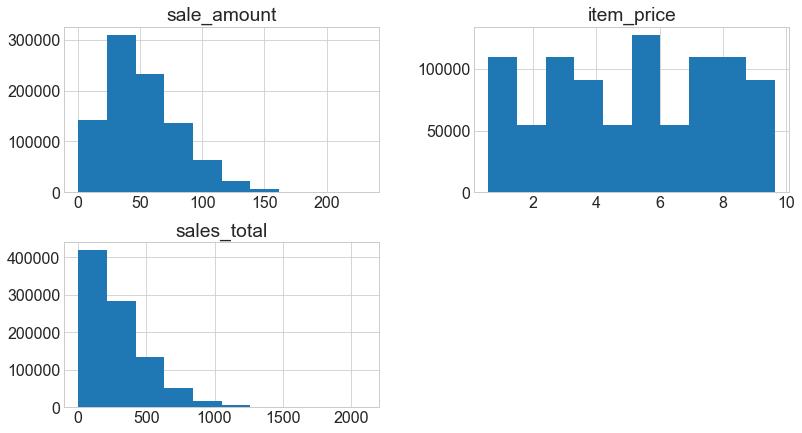

In [3]:
df = prep_store_data(df)
df.head()

# STORE DATASET

### Do your work for this exercise in a notebook named explore. Use the techniques in the lesson to explore the store item demand dataset and the opsd dataset.

### For the store item demand data, you will need to choose a method of aggregating such that each observation is a unique date. For both datasets you should choose a method of splitting your data and only explore the training split.

In [29]:
df.groupby(['sale_date']).sales_total.sum()

sale_date
2013-01-01 00:00:00+00:00     73844.01
2013-01-02 00:00:00+00:00     73570.58
2013-01-03 00:00:00+00:00     78169.48
2013-01-04 00:00:00+00:00     84467.73
2013-01-05 00:00:00+00:00     87621.85
                               ...    
2017-12-27 00:00:00+00:00    109151.15
2017-12-28 00:00:00+00:00    117377.49
2017-12-29 00:00:00+00:00    126541.84
2017-12-30 00:00:00+00:00    134903.07
2017-12-31 00:00:00+00:00    140905.74
Name: sales_total, Length: 1826, dtype: float64

<AxesSubplot:xlabel='sale_date'>

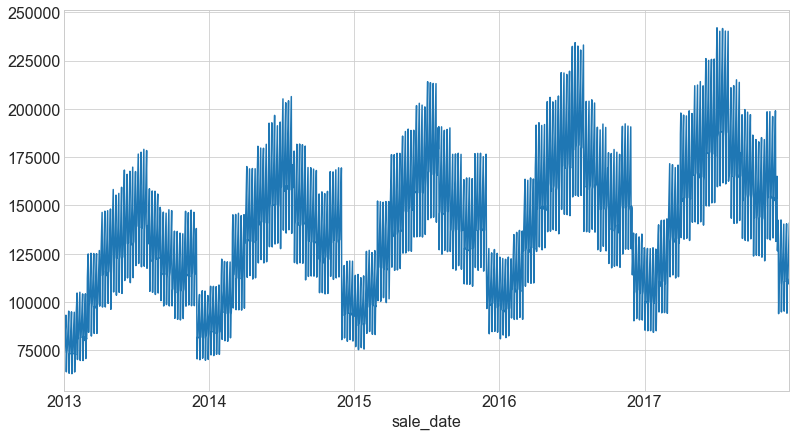

In [28]:
# here, we aggregate by sales_total and sale_date--results in a solitary date per observation
df.groupby(['sale_date']).sales_total.sum().plot()

In [5]:
df.shape

(913000, 16)

In [12]:
df.index.max(), df.index.min(), df.index.max() - df.index.min()

(Timestamp('2017-12-31 00:00:00+0000', tz='UTC'),
 Timestamp('2013-01-01 00:00:00+0000', tz='UTC'),
 Timedelta('1825 days 00:00:00'))

In [14]:
# df.isna().sum()
# NO NULLS

In [22]:
df.groupby('sale_date').describe().reset_index(drop=True)

sale_amount                                                   sale_id  \
           count    mean        std  min    25%   50%   75%    max   count   
0          500.0  27.392  13.314838  2.0  17.00  26.0  37.0   65.0   500.0   
1          500.0  27.356  13.735888  4.0  16.00  25.5  35.0   71.0   500.0   
2          500.0  28.976  14.317031  3.0  17.75  27.0  38.0   67.0   500.0   
3          500.0  31.354  15.115212  2.0  19.00  29.5  43.0   74.0   500.0   
4          500.0  32.474  16.436229  5.0  19.00  31.0  45.0   97.0   500.0   
...          ...     ...        ...  ...    ...   ...   ...    ...     ...   
1821       500.0  40.756  19.851363  6.0  25.00  39.0  54.0  105.0   500.0   
1822       500.0  43.770  21.043735  5.0  26.75  41.0  59.0  114.0   500.0   
1823       500.0  47.070  22.798699  4.0  27.00  44.0  64.0  110.0   500.0   
1824       500.0  49.976  24.660651  5.0  29.00  47.0  67.0  120.0   500.0   
1825       500.0  52.840  25.575351  8.0  31.75  49.0  70.0  129.0   500.0   

                ... store_zipcode          sales_total                         \
          mean  ...           75%      max       count       mean         std   
0     455588.0  ...       78232.0  78253.0       500.0  147.68802  112.166522   
1     455589.0  ...       78232.0  78253.0       500.0  147.14116  111.965366   
2     455590.0  ...       78232.0  78253.0       500.0  156.33896  121.148019   
3     455591.0  ...       78232.0  78253.0       500.0  168.93546  128.098408   
4     455592.0  ...       78232.0  78253.0       500.0  175.24370  137.422185   
...        ...  ...           ...      ...         ...        ...         ...   
1821  457409.0  ...       78232.0  78253.0       500.0  218.30230  163.916208   
1822  457410.0  ...       78232.0  78253.0       500.0  234.75498  174.921500   
1823  457411.0  ...       78232.0  78253.0       500.0  253.08368  191.676050   
1824  457412.0  ...       78232.0  78253.0       500.0  269.80614  206.907517   
1825  457413.0  ...       78232.0  78253.0       500.0  281.81148  210.202582   

                                                   
        min       25%      50%       75%      max  
0      4.44   50.5575  134.475  210.0575   592.15  
1      3.36   54.2100  129.720  214.4875   646.81  
2      6.72   53.0125  138.420  228.0250   610.37  
3      4.20   62.2875  145.820  246.6575   619.48  
4      5.40   62.5050  158.040  248.3250   756.13  
...     ...       ...      ...       ...      ...  
1821   7.20   78.7400  192.225  319.8100   956.55  
1822   6.72   87.0900  201.855  347.1800   857.28  
1823  10.44   91.5700  224.000  361.3800   920.11  
1824   7.80   94.0300  236.340  392.6700  1084.09  
1825  12.00  109.5600  247.280  399.8150   965.66  

[1826 rows x 72 columns]